In [27]:
import torch 
import sys 
from torchvision import datasets
from torchvision.transforms import transforms
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

from models.resnet import *

## CIFAR-10の準備

In [14]:
data_path = "./data/"
cifar10_train = datasets.CIFAR10(data_path, train=True, download=True, transform=transforms.ToTensor())
cifar10_test = datasets.CIFAR10(data_path, train=False, download=True, transform=transforms.ToTensor())

Files already downloaded and verified
Files already downloaded and verified


In [15]:
img, label = cifar10_train[99]

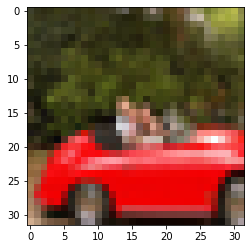

In [16]:
plt.imshow(img.permute(1,2,0))

## imageのaugumentationや正規化を実施した上で、再度cifar10を読み込む

In [19]:
train_img_stack = torch.stack([img_t for img_t, _ in cifar10_train])
mean = train_img_stack.view(3, -1).mean(dim=1)
std = train_img_stack.view(3, -1).std(dim=1)

In [24]:
transforms_train = transforms.Compose(
    [
        transforms.RandomCrop(32, padding=4),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(15),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
    ]
)


cifar10_train_aug = datasets.CIFAR10(data_path, train=True, download=True, transform=transforms_train)

Files already downloaded and verified


## DataLoaderを定義する

In [ ]:
cifar10_train_dataloader = DataLoader(cifar10_train_aug, batch_size=)